In [1]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [2]:
# Load data from excel file using pandas.read_excel
mkt = pd.read_excel("/Users/lap14809/Downloads/vef-capstone-datasource.xlsx")
mkt.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
mkt.describe(include='object')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  2012-08-31
freq          1127            864          12

In [4]:
mkt=mkt.drop(columns = ['Z_CostContact','Z_Revenue'])

# Data Context 
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

In [5]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
mkt.describe().T.round(2)

count      mean       std     min       25%      50%  \
ID                   2240.0   5592.16   3246.66     0.0   2828.25   5458.5   
Year_Birth           2240.0   1968.81     11.98  1893.0   1959.00   1970.0   
Income               2216.0  52247.25  25173.08  1730.0  35303.00  51381.5   
Kidhome              2240.0      0.44      0.54     0.0      0.00      0.0   
Teenhome             2240.0      0.51      0.54     0.0      0.00      0.0   
Recency              2240.0     49.11     28.96     0.0     24.00     49.0   
MntWines             2240.0    303.94    336.60     0.0     23.75    173.5   
MntFruits            2240.0     26.30     39.77     0.0      1.00      8.0   
MntMeatProducts      2240.0    166.95    225.72     0.0     16.00     67.0   
MntFishProducts      2240.0     37.53     54.63     0.0      3.00     12.0   
MntSweetProducts     2240.0     27.06     41.28     0.0      1.00      8.0   
MntGoldProds         2240.0     44.02     52.17     0.0      9.00     24.0   
NumDealsPurchases    2240.0      2.33      1.93     0.0      1.00      2.0   
NumWebPurchases      2240.0      4.08      2.78     0.0      2.00      4.0   
NumCatalogPurchases  2240.0      2.66      2.92     0.0      0.00      2.0   
NumStorePurchases    2240.0      5.79      3.25     0.0      3.00      5.0   
NumWebVisitsMonth    2240.0      5.32      2.43     0.0      3.00      6.0   
AcceptedCmp3         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp4         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp5         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp1         2240.0      0.06      0.25     0.0      0.00      0.0   
AcceptedCmp2         2240.0      0.01      0.11     0.0      0.00      0.0   
Complain             2240.0      0.01      0.10     0.0      0.00      0.0   
Response             2240.0      0.15      0.36     0.0      0.00      0.0   

                          75%       max  
ID                    8427.75   11191.0  
Year_Birth            1977.00    1996.0  
Income               68522.00  666666.0  
Kidhome                  1.00       2.0  
Teenhome                 1.00       2.0  
Recency                 74.00      99.0  
MntWines               504.25    1493.0  
MntFruits               33.00     199.0  
MntMeatProducts        232.00    1725.0  
MntFishProducts         50.00     259.0  
MntSweetProducts        33.00     263.0  
MntGoldProds            56.00     362.0  
NumDealsPurchases        3.00      15.0  
NumWebPurchases          6.00      27.0  
NumCatalogPurchases      4.00      28.0  
NumStorePurchases        8.00      13.0  
NumWebVisitsMonth        7.00      20.0  
AcceptedCmp3             0.00       1.0  
AcceptedCmp4             0.00       1.0  
AcceptedCmp5             0.00       1.0  
AcceptedCmp1             0.00       1.0  
AcceptedCmp2             0.00       1.0  
Complain                 0.00       1.0  
Response                 0.00       1.0

In [7]:
mkt.describe(include = 'object').T.round(2)

count unique         top  freq
Education       2240      5  Graduation  1127
Marital_Status  2240      8     Married   864
Dt_Customer     2240    663  2012-08-31    12

# Data Preprocessing
The plan would be:
1. Remove NaN values
2. Feature engineering with new variables:
    * Calculate __Age__ based on Year_Birth
    * Calculate __Spending__ based on Mnt of all products in the last 2 years
    * Calculate __Frequency__ based on Num of purchases in the last 2 years
3. Encode categorical variables: __Education, Marital_Status__
4. Handle outliers of numerical variables

#### ----Start of preprocessing step----

In [11]:
# Remove NA 
mkt_na = (mkt.isnull().sum() / len(mkt)) * 100
mkt_na = mkt_na.drop(mkt_na[mkt_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'miss_rate' :mkt_na})
missing_data.head(20)

#Fil NA of numerical data with mean 

## Calculate mean for every NUMERICAL data column
means = mkt._get_numeric_data().mean()

## Fill NA by mean on NUMERICAL data
mkt._get_numeric_data().fillna(means,inplace=True)

##Confirming there's no missing entries
missing_data.head(30)

Empty DataFrame
Columns: [miss_rate]
Index: []

##### Calculate new variable: Age
>We can see that Age values (in DESC) show some outliers, possibly when customers fill absurd values. Therefore, we need to remove these outliers.

In [12]:
# New metrics: Age based on Year_Birth
mkt['current_year'] = mkt['Dt_Customer'].max()
mkt['current_year'] = pd.to_datetime(mkt['current_year']).dt.year
mkt['Age'] = mkt['current_year']-mkt['Year_Birth']
mkt['Age'].sort_values(ascending=False) # There are outliers with entries over 100 years old -> to be dealt with later

239     121
339     115
192     114
1950     74
424      73
       ... 
696      19
747      19
995      19
1170     18
46       18
Name: Age, Length: 2240, dtype: int64

##### Calculate new variable: Accept

In [228]:
# New metrics: Accept any campaign in the past 

## Create a list of conditions
conditions = [
    (mkt['AcceptedCmp1'] == 1),
    (mkt['AcceptedCmp2'] == 1),
    (mkt['AcceptedCmp3'] == 1),
    (mkt['AcceptedCmp4'] == 1),
    (mkt['AcceptedCmp5'] == 1)
    ]
## Create a list of the values to assign for each condition
values = [1,1,1,1,1]
## Create a new column and use np.select to assign values to it using our lists as arguments
mkt['Accepted'] = np.select(conditions, values)
print('Acceptance rate is',mkt['Accepted'].sum()/len(mkt)*100)

Acceptance rate is 20.72678331090175


##### Calculate new variable: Spending

In [14]:
# New metrics: Spending 
sum_col_amount=['MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
mkt['Spending'] = mkt[sum_col_amount].sum(axis=1)
mkt['Spending'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Spending, dtype: float64

In [15]:
# New metrics: Frequency of purchases 
sum_col_frequency = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
mkt['Frequency'] = mkt[sum_col_frequency].sum(axis=1)

# Display updated DataFrame
mkt.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2240.0  52247.251354  25037.797168  1730.0  35538.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
current_year         2240.0   2014.000000      0.000000  2014.0   2014.00   
Age                  2240.0     45.194196     11.984069    18.0     37.00   
Accepted             2240.0      0.206696      0.405026     0.0      0.00   
Spending             2240.0    605.798214    602.249288     5.0     68.75   
Frequency            2240.0     14.862054      7.677173     0.0      8.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51741.5  68289.75  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
current_year          2014.0   2014.00    2014.0  
Age                     44.0     55.00     121.0  
Accepted                 0.0      0.00       1.0  
Spending               396.0   1045.50    2525.0  
Frequency               15.0     21.00      44.0

##### Initial description of numerical variables

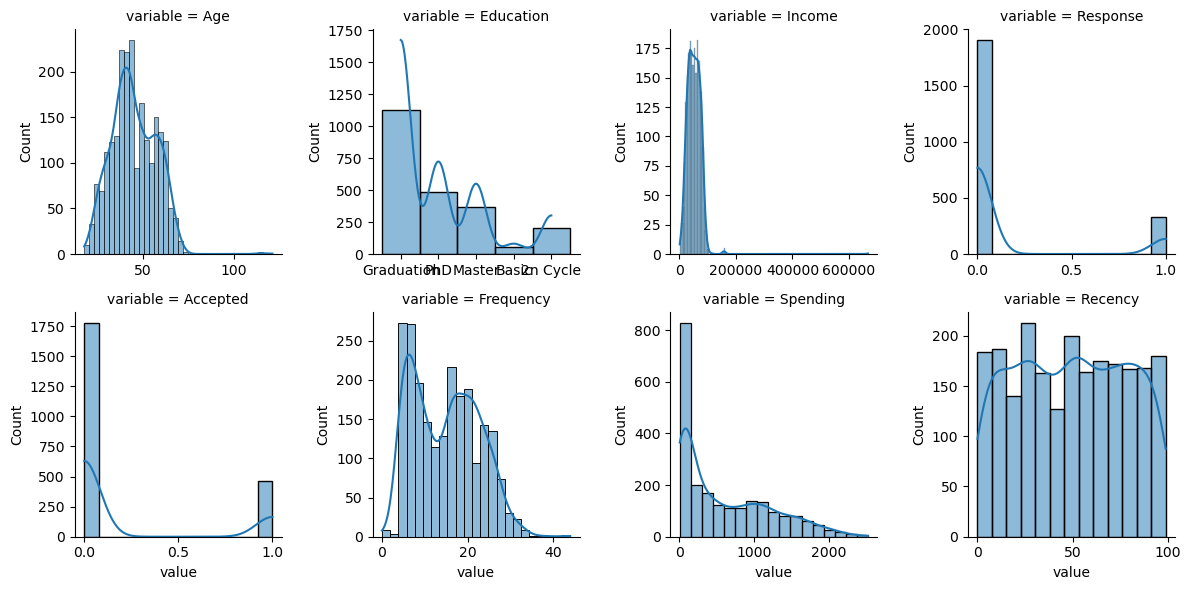

In [16]:
df = pd.DataFrame(data=mkt,columns=['Age','Education','Income','Response', 'Accepted', 'Frequency','Spending','Recency'])
# Facet grid of selected variables' histogram
nd1 = pd.melt(df, value_vars = df )
n1 = sb.FacetGrid (nd1, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sb.histplot, 'value',kde = True)
plt.show()

From distribution graphs, we can see:
>- *Gaussian distribution* presented in __Age__ and __Income__ variables, with both values consisting of outliers that disrupt sample's balance
>- *Multinomial distribution* presented in __Frequency__ variable   
>- __Education__ level focus on Graduation 
>- Total __Spending__ within 2 years are well below 250 dollars
>- Both __Response__ and __Accepted__ variables are highly imbalanced. 

Thus, our next step is to handle outliers of __Age__ and __Income__ using z-score 

Age and Income before

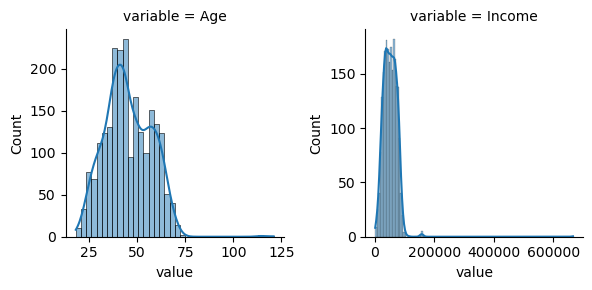

In [17]:
# Visualize histogram numerical values and handling outliers
df = pd.DataFrame(data=mkt, columns=['Age','Income'])
nd2 = pd.melt(df, value_vars = df )
n2 = sb.FacetGrid (nd2, col='variable', col_wrap=7, sharex=False, sharey = False)
n2 = n2.map(sb.histplot, 'value',kde = True)
plt.show()

Age and Income after

In [18]:
mkt = mkt[np.abs(stats.zscore(mkt.Age)) < 3]
mkt = mkt[np.abs(stats.zscore(mkt.Income)) < 3]

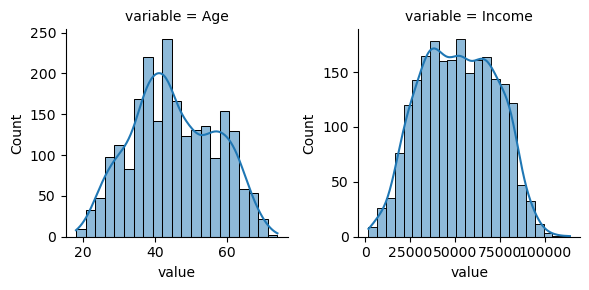

In [19]:
df = pd.DataFrame(data=mkt, columns=['Age','Income'])
nd2 = pd.melt(df, value_vars = df )
n2 = sb.FacetGrid (nd2, col='variable',col_wrap= 2, sharex=False, sharey = False)
n2 = n2.map(sb.histplot,'value',kde = True)
plt.show()

#### ----End of preprocessing step----

# EDA Analysis

## 1. Demographics 
1. Income by Education 
2. Income by Marital Status 
3. Kidhome, Teenhome by Marital Status

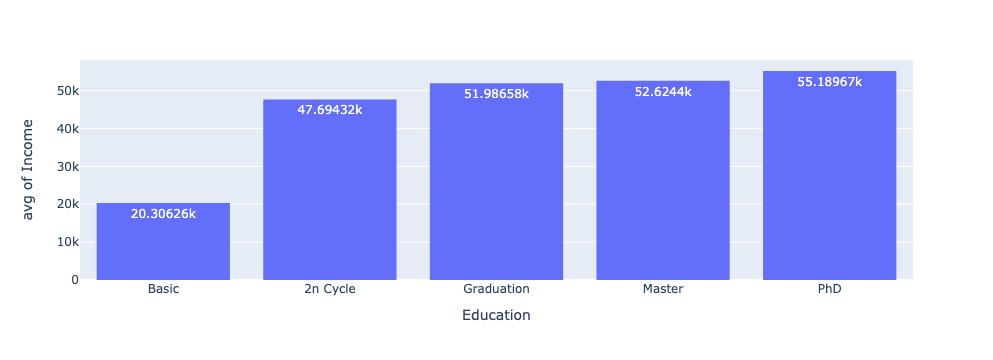

In [20]:
# 1.1. Income by Education 
df = mkt[['Income','Education']]
category_orders={"Education":["Basic","2n Cycle","Graduation","Master","PhD"]}
fig = px.histogram(df, x="Education",y="Income",  histfunc='avg',category_orders=category_orders,text_auto = True)
fig.show()

> In terms of income, __Education__ level *PhD* has highest income (=55k). *Master* comes in second (=52.6k) and *Graduation* (presumably similar to Bachelor degree in Vietnam) in third (=52k).

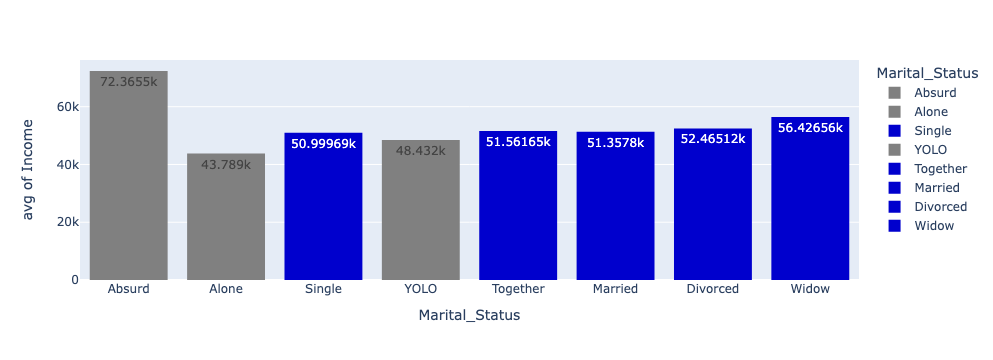

In [21]:
# 1.2. Income by Marital Status 
df = mkt[['Income','Marital_Status']]
category_orders={"Marital_Status":["Absurd","Alone","Single", "YOLO","Together","Married","Divorced","Widow"]}
fig = px.histogram(df, x='Marital_Status',y='Income', 
                   histfunc='avg',
                   category_orders=category_orders,
                   text_auto = True,
                   color = 'Marital_Status',
                   color_discrete_map = {'Absurd':'gray',
                                         'Alone':'gray',
                                         'YOLO':'gray',
                                         'Single':'mediumblue',
                                         'Together':'mediumblue',
                                         'Married':'mediumblue',
                                         'Divorced':'mediumblue',
                                         'Widow':'mediumblue'
                                       })
fig.show()

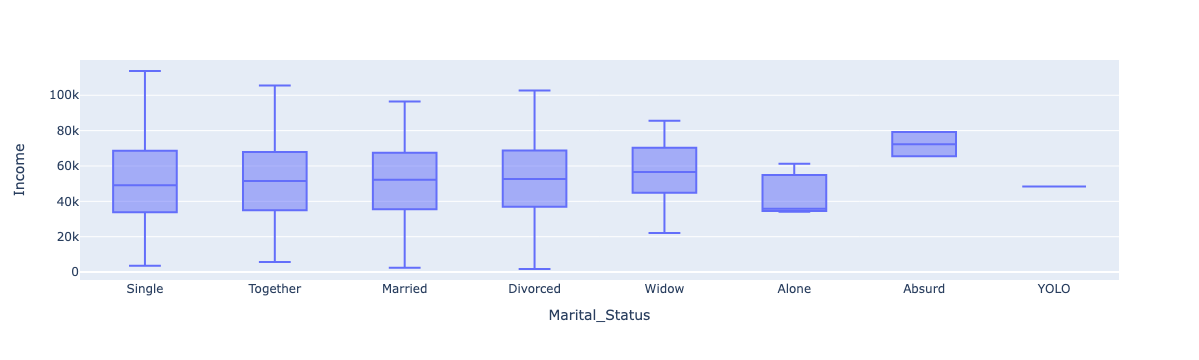

In [22]:
fig = px.box(mkt, x= 'Marital_Status', y= 'Income')
fig.show()

> Due to the modest sampling of *Absurd, Alone and YOLO*, insights related to their income are prone to be misleading. Thus, we exclude these variables when interpreting __Income level by Marital Status__. Generally, average income of Widow is highest (45k-70k), then Divorced (37k-69k) and Single (34k-69k). Together and Married statuses have similar income level at around 52k. Single ranks lowest with 50.9k. It seems that being in a *one person's band* bring a similar income level as when you are in *a couple* (Good note for Singles). 

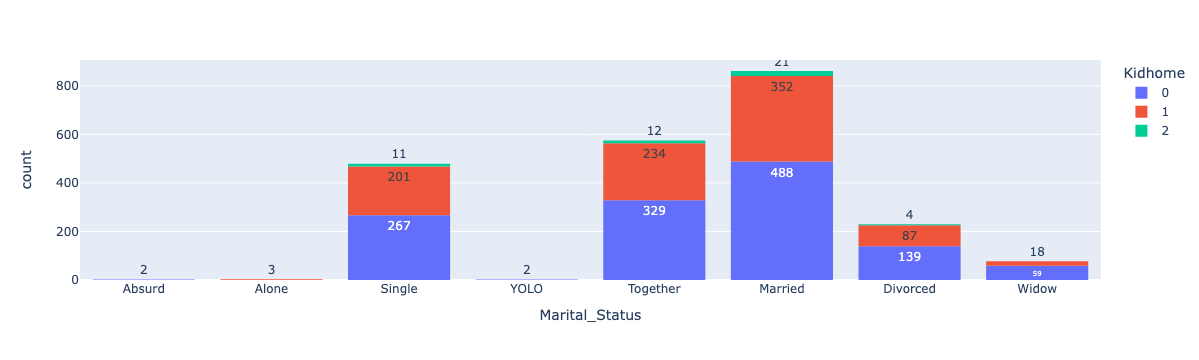

In [23]:
# 1.3. Kidhome, Teenhome by Marital Status
df = mkt[['Kidhome','Teenhome','Marital_Status']]
category_orders={"Marital_Status":["Absurd","Alone","Single", "YOLO","Together","Married","Divorced","Widow"]}
fig = px.histogram(df, x='Marital_Status',color = 'Kidhome',category_orders=category_orders,text_auto = True)
fig.show()

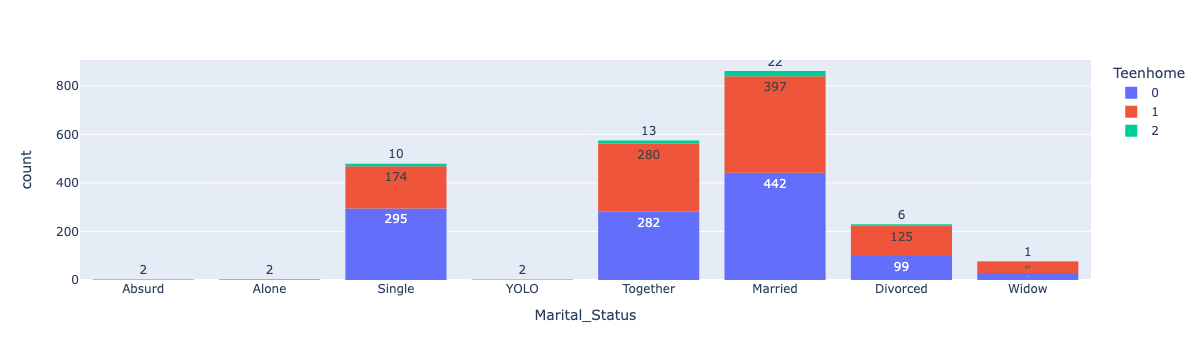

In [24]:
df = mkt[['Kidhome','Teenhome','Marital_Status']]
category_orders={"Marital_Status":["Absurd","Alone","Single", "YOLO","Together","Married","Divorced","Widow"]}
fig = px.histogram(df, x='Marital_Status',color = 'Teenhome',category_orders=category_orders,text_auto = True)
fig.show()

Despite their Marital Status, __Single__ and __Together__ still report having Kid and Teenager in their household. Some asssumptions can be made here: 
>- (1) Survey questions have likely misled samples in reporting Kid and Teenager in their family, rather than those living with them 
>- (2) Samples is really providing for Kids and Teenagers at their household (even they are single or only together)

This implies that future amendments (or clarification of different notions: *kid, teenager, living in household, in your family, etc.*) need to be made.

## 2. Shopping behaviors
1. Income by Spending, Recency, Frequency
2. Marital Status and Education by Recency, Spending, Frequency

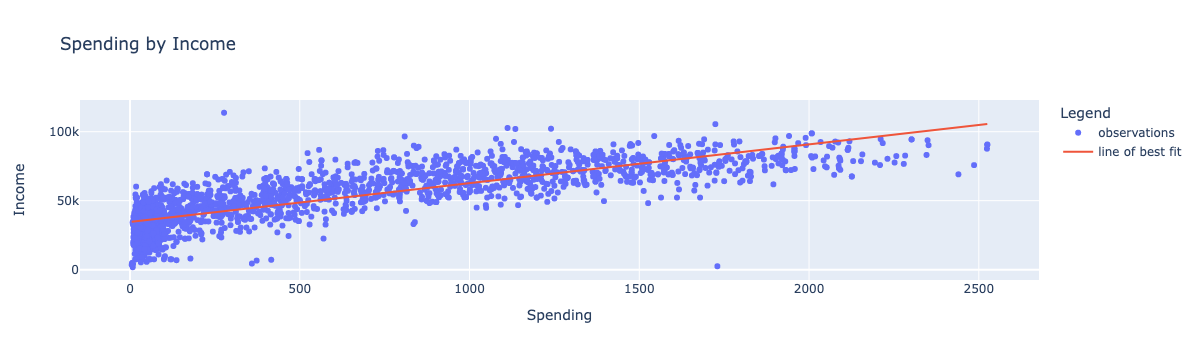

In [25]:
df = mkt.loc[:,('Income','Recency','Spending','Frequency','Marital_Status','Education')]
# 1.1. Spending by Income
reg = LinearRegression().fit(np.vstack(mkt['Spending']), mkt['Income'])
df['bestfit'] = reg.predict(np.vstack(mkt['Spending']))
fig = go.Figure(data=go.Scatter(name='observations',x=mkt['Spending'], y=mkt['Income'],mode='markers'))
fig.add_trace(go.Scatter(name='line of best fit', x=mkt['Spending'], y=df['bestfit'], mode='lines'))
fig.update_traces(hovertemplate='Spending: %{x} <br>Income: %{y}')
fig.update_layout(
    title='Spending by Income',
    xaxis_title='Spending',
    yaxis_title='Income',
    legend_title='Legend')
fig.show()

>- Spending seems to be __positively correlated__ with the income level

In [26]:
Spending=mkt[['Spending','Income']]
cor, pval = stats.spearmanr(Spending[['Spending']], Spending[['Income']])
print('Spearman correlation test : correlation coefficient : %.4f, pval: %.4f' % (cor, pval))

Spearman correlation test : correlation coefficient : 0.8566, pval: 0.0000


>- The p-value < alpha = 5% ==> We can reject the null hypothesis (__$H_0$__ : Spending and Income are not correlated). Moreover, the high correlation coefficient implies  __highly positive__ relationship between the two variables. 

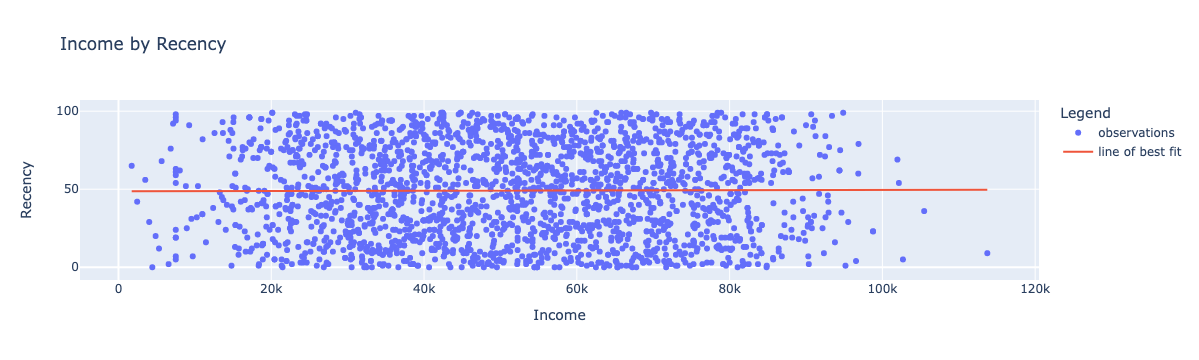

In [27]:
# 1.2. Income by Recency
reg = LinearRegression().fit(np.vstack(mkt['Income']), mkt['Recency'])
df['bestfit'] = reg.predict(np.vstack(mkt['Income']))
fig = go.Figure(data=go.Scatter(name='observations',x=mkt['Income'], y=mkt['Recency'],mode='markers'))
fig.add_trace(go.Scatter(name='line of best fit', x=mkt['Income'], y=df['bestfit'], mode='lines'))
fig.update_traces(hovertemplate='Income: %{x} <br>Recency: %{y}')
fig.update_layout(
    title='Income by Recency',
    xaxis_title='Income',
    yaxis_title='Recency',
    legend_title='Legend')
fig.show()

In [28]:
Recency=mkt[['Recency','Income']]
cor, pval = stats.spearmanr(Recency[['Recency']], Recency[['Income']])
print('Spearman correlation test : correlation coefficient : %.4f, pval: %.4f' % (cor, pval))

Spearman correlation test : correlation coefficient : 0.0093, pval: 0.6623


>- The p-value > alpha = 5% ==> We fail to reject the null hypothesis (__$H_0$__ : Recency and Income are not correlated). Moreover, the close-to-0 correlation coefficient implies  __low positive__ relationship between the two variables. 

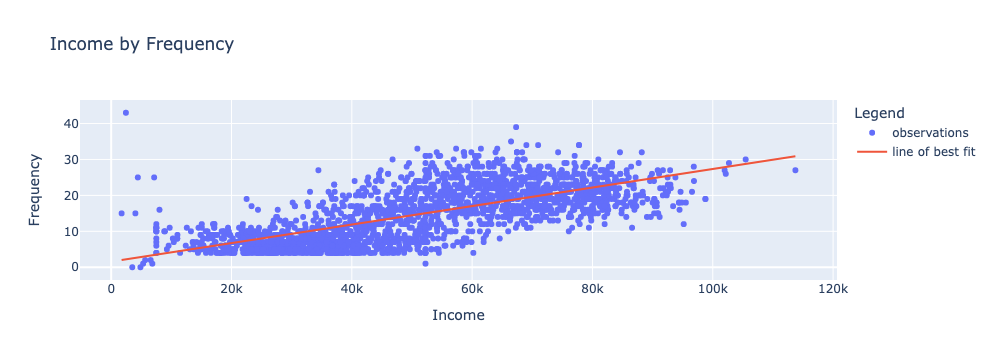

In [29]:
# 1.3. Income by Frequency
reg = LinearRegression().fit(np.vstack(mkt['Income']), mkt['Frequency'])
df['bestfit'] = reg.predict(np.vstack(mkt['Income']))
fig = go.Figure(data=go.Scatter(name='observations',x=mkt['Income'], y=mkt['Frequency'],mode='markers'))
fig.add_trace(go.Scatter(name='line of best fit', x=mkt['Income'], y=df['bestfit'], mode='lines'))
fig.update_traces(hovertemplate='Income: %{x} <br>Frequency: %{y}')
fig.update_layout(
    title='Income by Frequency',
    xaxis_title='Income',
    yaxis_title='Frequency',
    legend_title='Legend')
fig.show()

>- Frequency seems to be __positively correlated__ with the income level

In [30]:
Frequency=mkt[['Frequency','Income']]
cor, pval = stats.spearmanr(Frequency[['Frequency']], Frequency[['Income']])
print('Spearman correlation test : correlation coefficient : %.4f, pval: %.4f' % (cor, pval))

Spearman correlation test : correlation coefficient : 0.7197, pval: 0.0000


>- The p-value < alpha = 5% ==> We can reject the null hypothesis (__$H_0$__ : Frequency and Income are not correlated). Moreover, the relatively high correlation coefficient implies  __relatively high positive__ relationship between the two variables. 

In [31]:
# 2.2. Marital Status and Education by Recency, Spending, Frequency
df.loc[:,df.columns!='bestfit'].groupby('Marital_Status').agg(['mean','count']).round(1)

/var/folders/wf/8kt051b15mjgdtn6p1t13x3r0000gn/T/ipykernel_13504/3775953144.py:2: FutureWarning:

['Education'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Income       Recency       Spending       Frequency      
                   mean count    mean count     mean count      mean count
Marital_Status                                                            
Absurd          72365.5     2    53.0     2   1192.5     2      19.5     2
Alone           43789.0     3    30.3     3    256.7     3      13.3     3
Divorced        52465.1   230    49.1   230    615.6   230      15.3   230
Married         51357.8   861    48.2   861    589.0   861      14.9   861
Single          50999.7   479    49.6   479    607.7   479      14.3   479
Together        51561.6   575    50.3   575    607.1   575      14.8   575
Widow           56426.6    77    49.1    77    738.8    77      16.7    77
YOLO            48432.0     2     3.0     2    424.0     2      19.0     2

*Due to the lack of representation of Absurd, Alone and YOLO statuses in this dataset, we will ignore these variables hereafter*
>- In terms of marital statuses, Widow has the highest income level, well above 56k. They are also __heavy spenders__ with over 700usd. While for Single, their income closes 51k, nearly reaching the Married and Together's income level. As expected, Married and Together rank in second and third of spending amount. 
>- Generally, avg. latest purchase is __1.5 months ago__. This is unusually high for retailers. This coincides with __mere 13 to 20 times__ visiting the store in the 2-year time. 

In [32]:
df.loc[:,df.columns!='bestfit'].groupby('Education').agg(['mean','count']).round(1)

/var/folders/wf/8kt051b15mjgdtn6p1t13x3r0000gn/T/ipykernel_13504/4037003051.py:1: FutureWarning:

['Marital_Status'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Income       Recency       Spending       Frequency      
               mean count    mean count     mean count      mean count
Education                                                             
2n Cycle    47694.3   201    48.3   201    501.0   201      13.9   201
Basic       20306.3    54    48.4    54     81.8    54       7.0    54
Graduation  51986.6  1124    50.1  1124    620.0  1124      15.0  1124
Master      52624.4   369    47.6   369    613.3   369      15.0   369
PhD         55189.7   481    48.4   481    668.4   481      15.8   481

>- Per education level, __higher education__ brings home more income with avg.income well above 50k. 
>- Generally, avg. latest purchase is __more than 1.5 months ago__. Frequency of purchase is __7 to 16__ times visiting the store in the 2-year time.
>- 2nd cycles spending is even higher than basic level, indicating possible chance that it was the parents who fill in these information. 

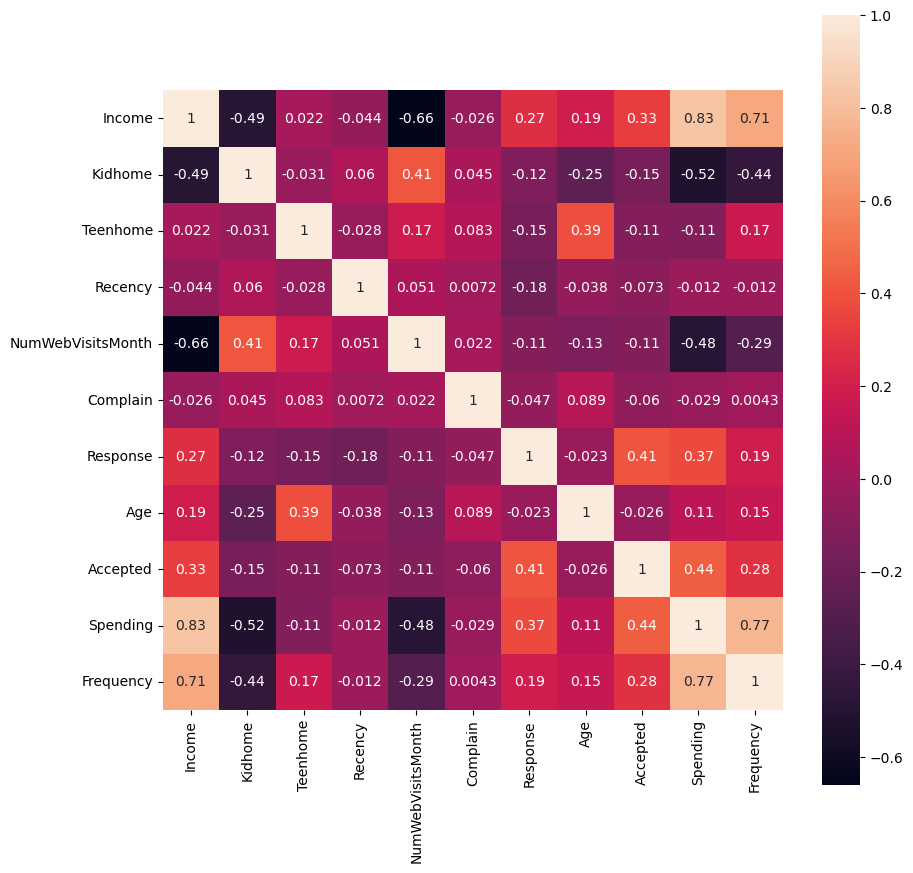

In [33]:
mkt_selected = mkt.drop(columns=['Year_Birth','current_year','ID',
                                 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', # Reflecting thru Accepted
                                'MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', # Reflecting thru Amount
                                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']) # Reflecting thru Frequency

corr_matrix = mkt_selected.sample(frac=0.25).corr('pearson')

# Plot the heatmap of Correlation
f, ax = plt.subplots(figsize=(10,10))
sb.heatmap(corr_matrix, vmax=1, annot=True, square=True);
plt.show()

> It seems that several variables are heavily independent (Spending & Frequency...). Therefore, we need to conduct multicollinearity test. 

## 3. Insights from EDA process
In terms of income, __Education__ level *PhD* has highest income (=55k). *Master* comes in second (=52.6k) and *Graduation* (presumably similar to Bachelor degree in Vietnam) in third (=52k).

Due to the modest sampling of *Absurd, Alone and YOLO*, insights related to their income are prone to be misleading. Thus, we exclude these variables when interpreting __Income level by Marital Status__. Generally, average income of Widow is highest (45k-70k), then Divorced (37k-69k) and Single (34k-69k). Together and Married statuses have similar income level at around 52k. Single ranks lowest with 50.9k. It seems that being in a *one person's band* bring a similar income level as when you are in *a couple* (Good note for Singles). 

Despite their Marital Status, Single and Together still report having Kid and Teenager in their household. Some asssumptions can be made here: 
* (1) Survey questions have likely misled samples in reporting Kid and Teenager in their family, rather than those living with them 
* (2) Samples is really providing for Kids and Teenagers at their household (even they are single or only together)

This implies that future amendments (or clarification of different notions: *kid, teenager, living in household, in your family, etc.*) need to be made.

In terms of __Shopping behaviors__, we found that spending is highly correlated with income level. Also, higher income also signifies more frequent purchases. Thus, for premium customers, we should designs promotional campaigns with __high-end, daily-necessity__ products. 

In [34]:
# One-hot encoding Marital Status
#mkt = pd.get_dummies(mkt, columns =['Marital_Status'], prefix='Marital_Status')

# Convert Education level to ordinal values 
mkt['Education'].replace({'Basic':1, '2n Cycle':2, 'Graduation':3, 'Master':4, 'PhD': 5}, inplace = True)

# Drop redundant columns 
mkt_selected = mkt.drop(columns=['Year_Birth','current_year',
                                 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', # Reflecting thru Accepted
                                'MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', # Reflecting thru Spending
                                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']) # Reflecting thru Frequency

# Handling Multicollinearity 
From EDA process, we learned that some variables are interrelated. Therefore, to avoid multicollinearity, we calculate: 
1. The variance inflation factor (VIF) identifies the strength of correlation among the predictors
2. Feature selection 

Reference: 
* https://www.analyticsvidhya.com/blog/2021/02/multicollinearity-problem-detection-and-solution/ 
* https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python


In [35]:
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

mkt_selected_numerical = mkt_selected._get_numeric_data()

def vif_arr (mkt_selected_numerical):
    vif = pd.DataFrame()
    mkt_selected_numerical = sma.add_constant(mkt_selected_numerical) # because the func. doesn't assume the intercept by default while calculating the VIFs
    vif ['Variables'] = mkt_selected_numerical.columns
    vif ['VIF'] = [variance_inflation_factor(mkt_selected_numerical.values,i) for i in range (mkt_selected_numerical.shape[1])]
    return(vif)

vif_arr(mkt_selected_numerical).sort_values(by ='VIF',ascending=False)

Variables        VIF
0               const  65.165291
12           Spending   5.223965
3              Income   4.786051
13          Frequency   2.867118
7   NumWebVisitsMonth   2.063897
4             Kidhome   1.633049
5            Teenhome   1.475940
11           Accepted   1.350883
9            Response   1.292531
10                Age   1.261993
2           Education   1.086726
6             Recency   1.056478
1                  ID   1.006657
8            Complain   1.005055

In [36]:
# Solution 2
X = mkt_selected_numerical.assign(const=1)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

ID                    1.006657
Education             1.086726
Income                4.786051
Kidhome               1.633049
Teenhome              1.475940
Recency               1.056478
NumWebVisitsMonth     2.063897
Complain              1.005055
Response              1.292531
Age                   1.261993
Accepted              1.350883
Spending              5.223965
Frequency             2.867118
const                65.165291
dtype: float64

Customarily, variables with VIF score < 10 is recognized as limited interdependences. Therefore, we did not excluse any variables for further modeling.

# Response Rate

In [8]:
print('Last campaign response rate:',(mkt['Response'].sum()/len(mkt['Response'])*100).round(2),'%')

Last campaign response rate: 14.91 %


In [9]:
sub_mkt=mkt[mkt['Response']==1]
sub_mkt

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
8      4855        1974         PhD       Together  30351.0        1   
15     2114        1946         PhD         Single  82800.0        0   
33     7373        1952         PhD       Divorced  46610.0        0   
39     2968        1943         PhD       Divorced  48948.0        0   
...     ...         ...         ...            ...      ...      ...   
2194   7118        1957  Graduation        Married  73803.0        0   
2198   2632        1954  Graduation        Married  50501.0        1   
2202  11133        1973         PhD           YOLO  48432.0        0   
2221   7366        1982      Master         Single  75777.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0  2012-09-04       58       635  ...                   10   
8            0  2013-06-06       19        14  ...                    0   
15           0  2012-11-24       23      1006  ...                    6   
33           2  2012-10-29        8        96  ...                    1   
39           0  2013-02-01       53       437  ...                   10   
...        ...         ...      ...       ...  ...                  ...   
2194         1  2012-08-01       61       833  ...                    5   
2198         1  2013-06-18       10       297  ...                    4   
2202         1  2012-10-18        3       322  ...                    1   
2221         0  2013-07-04       12       712  ...                    6   
2239         1  2012-10-15       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
8                     2                  9             0             0   
15                   12                  3             0             0   
33                    6                  6             0             0   
39                    5                  6             1             0   
...                 ...                ...           ...           ...   
2194                  6                  6             1             0   
2198                  4                  6             1             0   
2202                  6                  8             0             0   
2221                 11                  1             0             1   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
8                0             0             0         0         1  
15               1             1             0         0         1  
33               0             0             0         0         1  
39               0             0             0         0         1  
...            ...           ...           ...       ...       ...  
2194             0             0             0         0         1  
2198             0             0             0         0         1  
2202             0             0             0         0         1  
2221             1             0             0         0         1  
2239             0             0             0         0         1  

[334 rows x 27 columns]

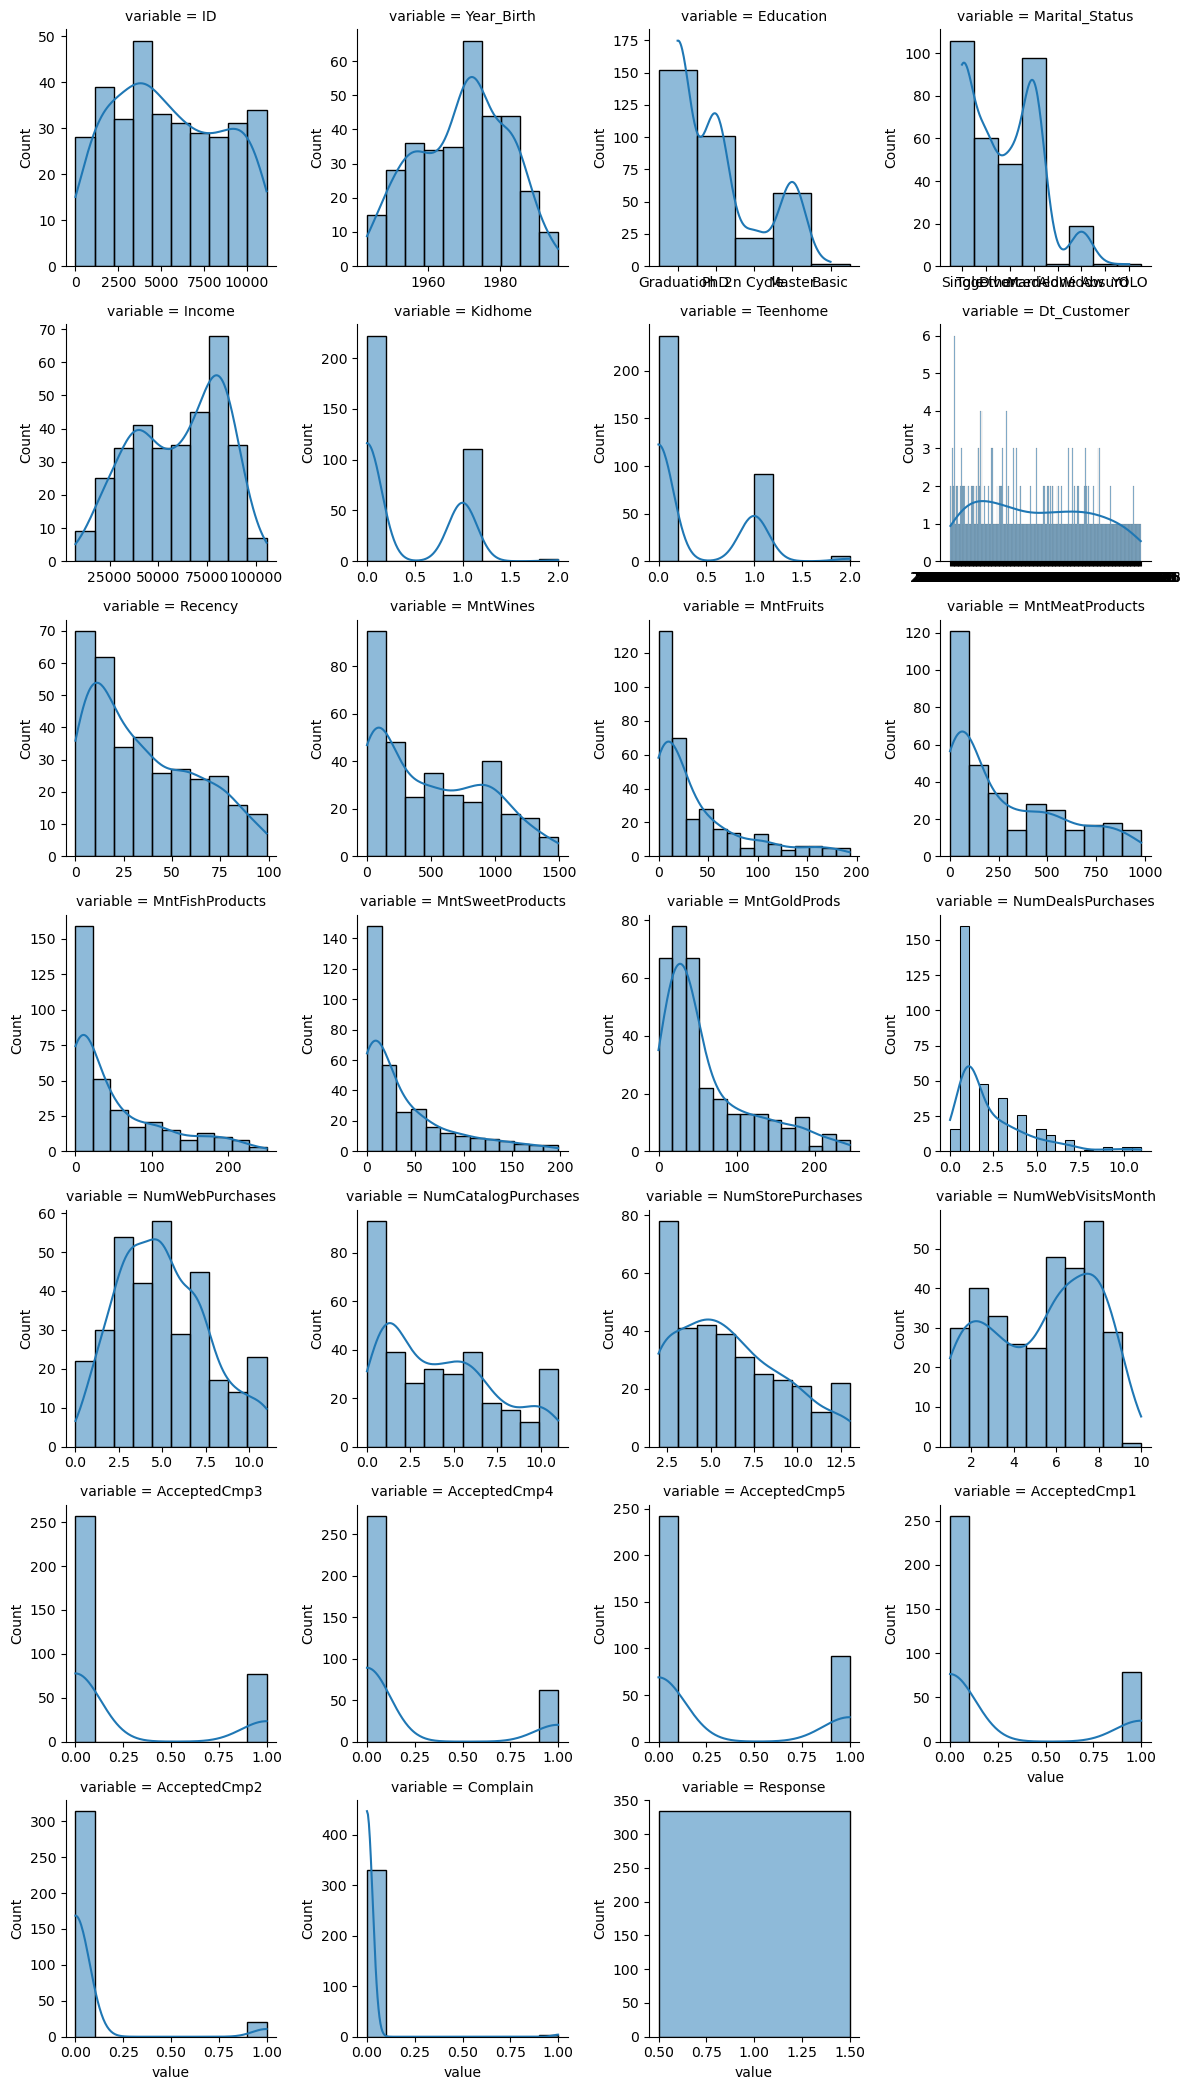

In [10]:
# Facet grid of selected variables' histogram
nd0 = pd.melt(sub_mkt, value_vars = sub_mkt )
n0 = sb.FacetGrid (nd0, col='variable', col_wrap=4, sharex=False, sharey = False)
n0 = n0.map(sb.histplot, 'value',kde = True)
plt.show()

# Classfication 
* Develop logistic regression model based on random forest 

# Dealing with imbalance
* Use ROC score and F1 score to deal with imbalance of this dataset

In [189]:
print('Acceptance rate of last campaign  is:',(mkt['Response'].sum())/len(mkt['Response'])*100,'%')
print ('The dataset is imbalance')

Acceptance rate of last campaign  is: 14.984297891431133 %
The dataset is imbalance


# Clustering users for deeper insight
To gain more insights for campaign design, we use RFM model to depict user's persona. RFM is a customer segmentation algorithm built from purchasing behaviour:
* Recency: the recency of purchase 
* Frequency: the frequency of purchases in the last two years
* Monetary (Spending): the amount they have spent in the last two years

The RFM Analysis will help the businesses to segment their customer base into different homogeneous groups so that we can engage with each group with 
different targeted marketing strategies.

## Plan

1. Create Recency Frequency Monetary (RFM) table
2. Model — Clustering with K-means algorithm
3. Interpret the result

## Step 1: Create Recency Frequency Monetary (RFM) table

In [110]:
mkt_selected.describe().T

count          mean           std     min      25%  \
ID                 2229.0   5589.296097   3244.840538     0.0   2829.0   
Education          2229.0      3.458502      1.003005     1.0      3.0   
Income             2229.0  51628.825945  20601.302353  1730.0  35416.0   
Kidhome            2229.0      0.444594      0.538636     0.0      0.0   
Teenhome           2229.0      0.507402      0.544735     0.0      0.0   
Recency            2229.0     49.106326     28.946476     0.0     24.0   
NumWebVisitsMonth  2229.0      5.334231      2.414981     0.0      3.0   
Complain           2229.0      0.008973      0.094319     0.0      0.0   
Response           2229.0      0.149843      0.356998     0.0      0.0   
Age                2229.0     45.111261     11.707430    18.0     37.0   
Accepted           2229.0      0.207268      0.405440     0.0      0.0   
Spending           2229.0    605.541050    601.032228     5.0     69.0   
Frequency          2229.0     14.869000      7.622187     0.0      8.0   
Monetary           2229.0    605.541050    601.032228     5.0     69.0   

                       50%      75%       max  
ID                  5455.0   8420.0   11191.0  
Education              3.0      4.0       5.0  
Income             51563.0  68118.0  113734.0  
Kidhome                0.0      1.0       2.0  
Teenhome               0.0      1.0       2.0  
Recency               49.0     74.0      99.0  
NumWebVisitsMonth      6.0      7.0      20.0  
Complain               0.0      0.0       1.0  
Response               0.0      0.0       1.0  
Age                   44.0     55.0      74.0  
Accepted               0.0      0.0       1.0  
Spending             397.0   1044.0    2525.0  
Frequency             15.0     21.0      43.0  
Monetary             397.0   1044.0    2525.0

In [111]:
# RFM table
mkt_selected['Monetary'] = mkt_selected ['Spending']
rfm = mkt_selected.loc[:,['ID', 'Recency','Frequency','Monetary']]

# Check if customer ID duplicates
print('Duplicate entries: {}'.format(rfm.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((rfm.duplicated().sum()/rfm.shape[0])*100),2))
#Remove duplicate data
rfm.drop_duplicates(inplace = True)

Duplicate entries: 0
0% rows are duplicate.


### Recency, Frequency, Monetary Distributions

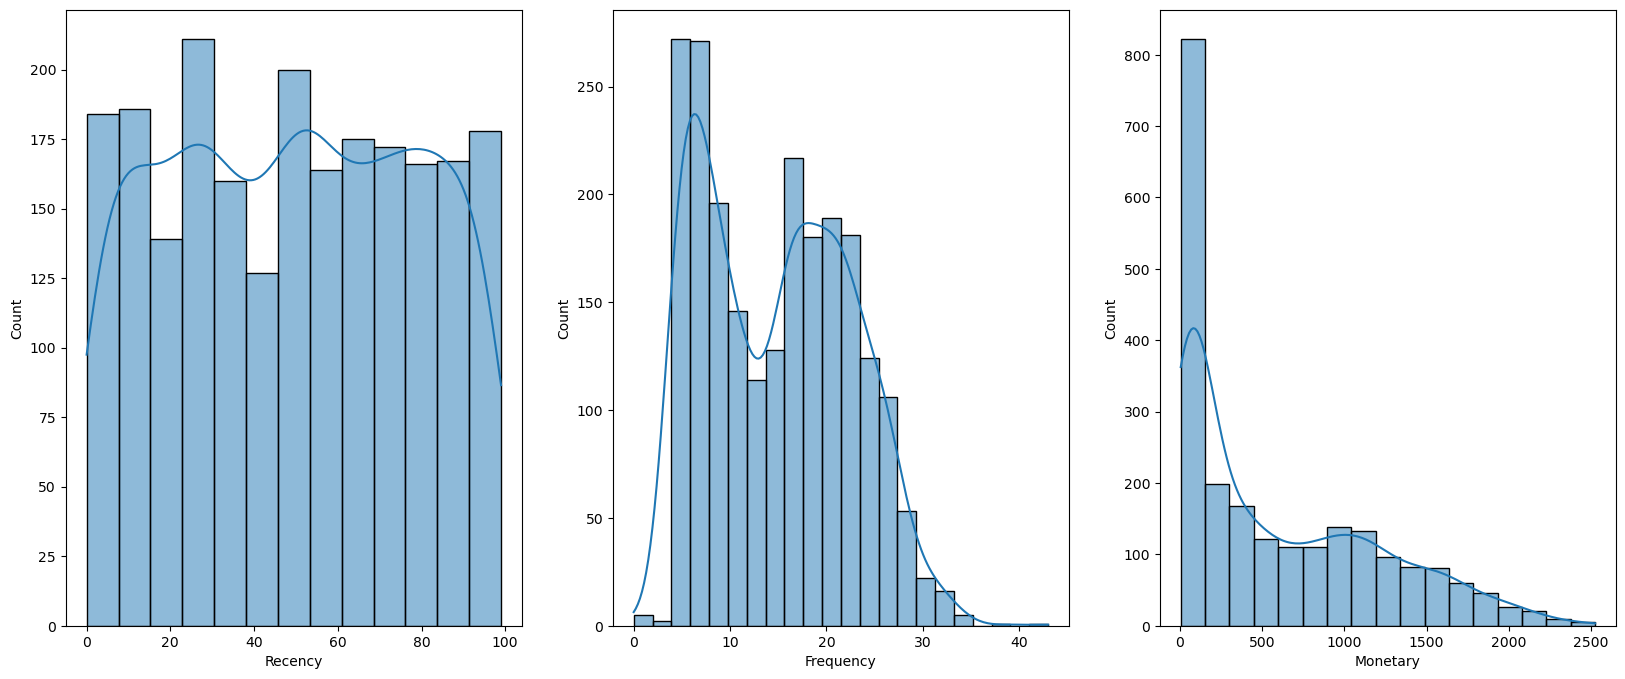

In [112]:
plt.figure(figsize=(20,8))

# Plot recency distribution
plt.subplot(1, 3, 1)
rfm_recency = sb.histplot(rfm['Recency'], kde = True)

# Plot frequency distribution
plt.subplot(1, 3, 2)
rfm_frequency = sb.histplot(rfm['Frequency'], kde = True)

# Plot monetary value distribution
plt.subplot(1, 3, 3)
rfm_monetary = sb.histplot(rfm['Monetary'], kde = True)

# Show the plot
plt.show()

>- For variable __Frequency__, some outliers are affecting the symmetrical form of the variable. Whereas, variable __Monetary__ skews right. 
>- We need to (1) remove outliers of Frequency and (2) manage Monetary's skewness. There are some methods that we can use to manage the skewness:
> 1. Log transformation
> 2. Square root transformation
> 3. Box-cox transformation Note: We can use the transformation if and only if the variable only has positive values.

Reference: 
* Difference between MinMaxScaler and StandardScaler: https://vitalflux.com/minmaxscaler-standardscaler-python-examples/#:~:text=The%20MinMaxscaler%20is%20a%20type,range%20from%20min%20to%20max.

In [113]:
# Manage skewness
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2,figsize=(10,4))
    sb.histplot(rfm[x], ax=ax[0,0], kde = True, legend=None)
    sb.histplot(np.log(rfm[x]), ax=ax[0,1], kde = True, legend=None)
    sb.histplot(np.sqrt(rfm[x]), ax=ax[1,0], kde = True, legend=None)
    sb.histplot(stats.boxcox(rfm[x]), ax=ax[1,1], kde = True, legend=None)
    print('Log Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', np.log(rfm[x]).skew().round(2))
    print('Square Root Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', np.sqrt(rfm[x]).skew().round(2))
    print('Box-Cox Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))#

Log Transform : The skew coefficient of 0.86 to -0.38
Square Root Transform : The skew coefficient of 0.86 to 0.29
Box-Cox Transform : The skew coefficient of 0.86 to -0.12


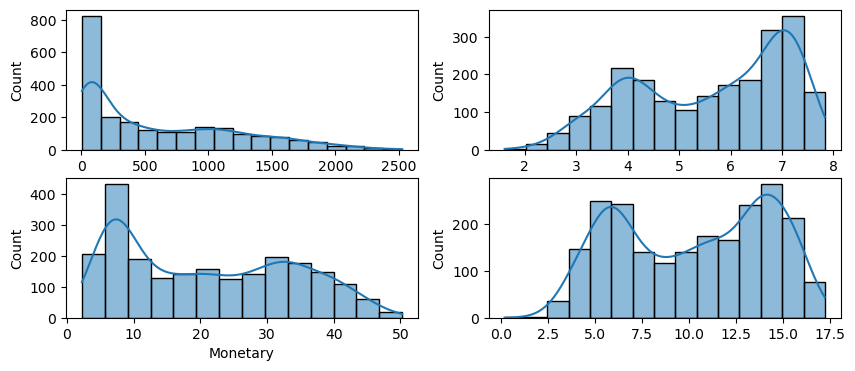

In [114]:
analyze_skewness('Monetary')
plt.show()

Based on the skew coefficient, we will use box-cox transformation for Monetary since this method reduces skewness significantly: 
>Box-Cox Transform : The skew coefficient of 0.89 to -0.12

In [115]:
# Set the Numbers
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix['Recency'] = rfm['Recency']
customers_fix['Frequency'] = rfm['Frequency']
customers_fix['Monetary'] = stats.boxcox(rfm['Monetary'])[0]
customers_fix.tail() #viewing the last 5 lines

Recency  Frequency   Monetary
2235       46         18  14.755180
2236       56         22  11.090163
2237       91         19  14.473769
2238        8         23  13.126774
2239       40         11   8.477658

In [116]:
customers_fix['Monetary'].describe().round(2)

count    2229.00
mean       10.23
std         3.96
min         1.87
25%         6.35
50%        10.76
75%        13.86
max        17.21
Name: Monetary, dtype: float64

> Each variable don’t have the same mean and variance (or scale). Therefore, we have to normalize it using StandardScaler object from scikit-learn library. 
Unlike normalization, __standardization__ maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values.

In [45]:
# Remove outliers 
#quantiles = rfm[['Recency','Frequency','Monetary']].quantile([0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

#rfm = rfm[
 #   (rfm['Recency'] < quantiles.loc[0.95, 'Recency']) & 
  #  (rfm['Frequency'] < quantiles.loc[0.95, 'Frequency']) & 
   # (rfm['Monetary'] < quantiles.loc[0.95, 'Monetary'])]

In [232]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) 
print(customers_normalized.std(axis = 0).round(2)) 

[-0.  0.  0.]
[1. 1. 1.]


In [118]:
pd.DataFrame(customers_normalized).head()

0         1         2
0  0.307314  1.329444  1.316649
1 -0.383771 -1.163838 -1.447244
2 -0.798422  0.804543  0.660253
3 -0.798422 -0.901387 -1.119646
4  1.551268  0.542092  0.177781

## Step 2: Clustering with K-means algorithm

In [120]:
# Import relevant libraries 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### Determine the Optimal K using Elbow method
The __SSE__ is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

In [121]:
KS = list(range(1, 20))
print('KS = ', KS)

KS =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


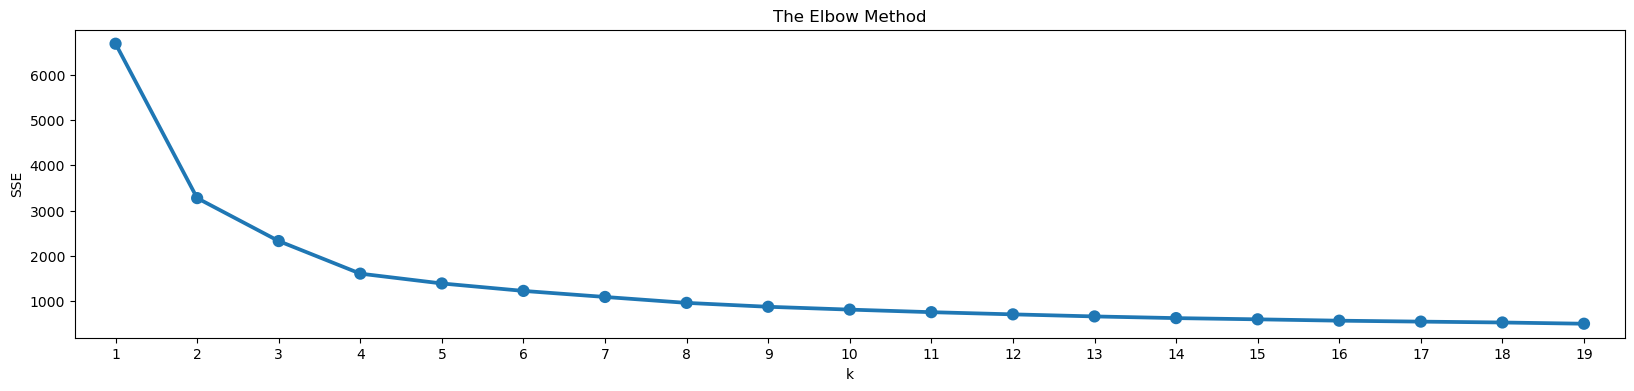

In [122]:
plt.figure(figsize=(20,4))

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in KS:
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(customers_normalized)
    distortions.append(sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,'euclidean'), axis=1)) / customers_normalized.shape[0])
    inertias.append(kmeans.inertia_)
    mapping1[k] = sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,'euclidean'), axis=1)) / customers_normalized.shape[0]
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sb.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

> We can see that from k = 4, the k-value is close to be __linear__ on the next consecutive k. Therefore, we take `K=4` for our modeling.

Bear in mind that the KMeans function is stochastic (the results may vary even if you run the function with the same inputs' values). Hence, in order to make the results reproducible, you can specify a value for the random_state parameter. This helps to start with the same random data point as centroid if you use Kmeans++ for initializing centroids or Start with same K random data points as centroid if you use random initialization.

Reference: https://stackoverflow.com/questions/46108753/what-is-meant-by-the-term-random-state-in-kmeans-function-in-package-sklear

In [124]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(2229,)

In [125]:
rfm.shape

(2229, 4)

In [126]:
rfm['Cluster'] =model.labels_
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          75.2       8.0    103.8   500
1          72.4      20.9   1057.6   635
2          22.5      20.7   1002.8   583
3          25.0       7.3     81.4   511

### Cluster Visualization

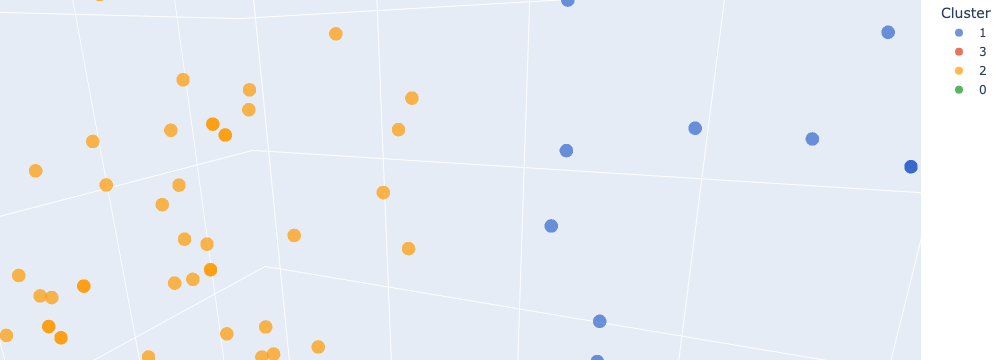

In [127]:
rfm_fig = rfm.copy()

rfm_fig['Cluster'] = rfm_fig['Cluster'].astype(str)

import plotly.express as px
fig = px.scatter_3d(rfm_fig,x='Recency', y='Frequency', z='Monetary',
              color='Cluster', opacity=0.7,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [140]:
# Aggregate data by each customer
fig_cluster = rfm.groupby('Cluster').agg({'ID': lambda x: len(x)}).reset_index()


# Rename columns
fig_cluster.rename(columns={'ID': 'Count'}, inplace=True)
fig_cluster['percent'] = (fig_cluster['Count'] / fig_cluster['Count'].sum()) * 100
fig_cluster['percent'] = fig_cluster['percent'].round(1)

fig_cluster.head()

Cluster  Count  percent
0        0    500     22.4
1        1    635     28.5
2        2    583     26.2
3        3    511     22.9

### Relative importance of each variable to each cluster

In [141]:
cluster_avg = rfm[['Cluster','Recency','Frequency','Monetary']].groupby(['Cluster']).mean()
population_avg = rfm[['Recency','Frequency','Monetary']].head().mean()
relative_imp = cluster_avg / population_avg - 1

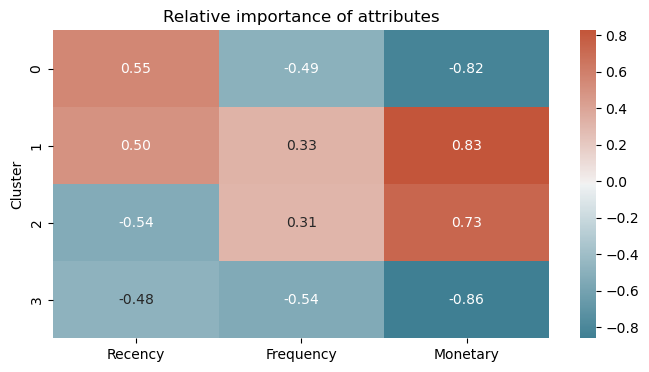

In [145]:
cmap = sb.diverging_palette(220, 20, as_cmap=True)
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sb.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap=cmap)
plt.show()

In [146]:
rfm.groupby('Cluster').agg({'Cluster':'count',
                            'Recency':['min',np.median,'mean','max'],
                            'Frequency':['min',np.median,'mean','max'],
                            'Monetary':['min',np.median,'mean','max']}).round(2)

Cluster Recency                   Frequency                    \
          count     min median   mean max       min median   mean max   
Cluster                                                                 
0           500      48   77.0  75.19  99         0    7.0   8.04  16   
1           635      47   72.0  72.40  99        10   21.0  20.95  39   
2           583       0   23.0  22.47  48        10   20.0  20.73  43   
3           511       0   25.0  25.03  52         0    7.0   7.31  15   

        Monetary                         
             min  median     mean   max  
Cluster                                  
0              5    67.5   103.83  1679  
1            235  1005.0  1057.65  2524  
2            221   960.0  1002.83  2525  
3              6    57.0    81.37   393

In [222]:
rfm['Accepted'] = mkt['Accepted']
rfm['Accepted%'] = (rfm['Accepted']*100)/(rfm['Accepted'].sum())
rfm['Accepted%'] = rfm['Accepted%'].round(2)
rfm.groupby('Cluster').agg({'Cluster':'count','Accepted':'sum','Accepted%':'sum'})

Cluster  Accepted  Accepted%
Cluster                              
0            500        38       8.36
1            635       193      42.46
2            583       186      40.92
3            511        45       9.90

The four clusters is separated from each other with some outliers being noticeable. The result indicates a good heterogeneous mix of clusters.

| Cluster | Type of customer | Percentage | RMF interpretation | Importance of attributes
| --- | --- | --- | -- | ---|
| 0 | Churned customers | 22.4% | Customers purchase *long time ago* and have a *low* purchase frequency, with a *low* amount of spending. | Recency
| 1 | At-risk customers | 28.5% | Customers purchase *long time ago* and have a *high* purchase frequency, with a *high* amount of spending.| Monetary > Recency > Frequency
| 2 | Loyal customers | 26.2% | Customers purchase *recently*  and have a *high* purchase frequency, with a *high* amount of spending.| Monetary > Frequency
| 3 | New customers | 22.9% | Customers purchase *recently* and have a *high* purchase frequency, with a *low* amount of spending.| 

From these characteristics, some business insights can be useful for upcoming campaign:
| Cluster | Type of customer | Business Insights | 
| --- | --- | --- | 
| 0 | Churned customers | Low priority. Considering resources at hand, we could revive this group with campaign emphasizing on improved image and/or features.
| 1 | At-risk customers | This group is price sensitive. Past data also prove that this group is highly engaging in marketing campaign. Therefore, campaign emphasizing on price reduction could be appealing to this group. 
| 2 | Loyal customers | This group is loyalist focusing on monetary value and frequenty make purchases. Past data also prove that this group is highly engaging in marketing campaign. Thus, membership's deals (such as buy more get more, or -x% for next purchase) could potentially drive even higher frequency of purchase. 
| 3 | New customers | These customers are testing their new retailer. Therefore, we can drive more traffic by increasing push notifications of hot deals to incentivize them.

### Thank you for listening!